In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer


%matplotlib inline
sns.set_style("whitegrid")

In [21]:
data=pd.read_csv("/content/creditcard.csv")
df=pd.DataFrame(data)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0.00
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0.00
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0.00
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0.00
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0.00


In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
data_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245601 entries, 0 to 245600
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    245601 non-null  float64
 1   V1      245601 non-null  float64
 2   V2      245601 non-null  float64
 3   V3      245601 non-null  float64
 4   V4      245601 non-null  float64
 5   V5      245601 non-null  float64
 6   V6      245601 non-null  float64
 7   V7      245601 non-null  float64
 8   V8      245601 non-null  float64
 9   V9      245601 non-null  float64
 10  V10     245601 non-null  float64
 11  V11     245601 non-null  float64
 12  V12     245601 non-null  float64
 13  V13     245601 non-null  float64
 14  V14     245601 non-null  float64
 15  V15     245601 non-null  float64
 16  V16     245601 non-null  float64
 17  V17     245601 non-null  float64
 18  V18     245601 non-null  float64
 19  V19     245601 non-null  float64
 20  V20     245601 non-null  float64
 21  V21     24

In [24]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,245601.00,245601.00,245601.00,245601.00,245601.00,245601.00,245601.00,245601.00,245601.00,245601.00,...,245601.00,245600.00,245600.00,245600.00,245600.00,245600.00,245600.00,245600.00,245600.00,245600.00
mean,84100.18,-0.04,-0.02,0.11,0.03,-0.04,0.02,-0.02,0.00,0.00,...,-0.00,-0.01,-0.01,0.00,0.02,0.00,-0.00,0.00,91.03,0.00
std,42147.84,1.96,1.67,1.51,1.42,1.38,1.33,1.23,1.20,1.11,...,0.74,0.72,0.64,0.61,0.51,0.49,0.40,0.33,252.60,0.04
min,0.00,-56.41,-72.72,-33.68,-5.68,-42.15,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-11.71,0.00,0.00
25%,49815.00,-0.94,-0.61,-0.69,-0.83,-0.73,-0.75,-0.56,-0.20,-0.66,...,-0.23,-0.53,-0.17,-0.35,-0.29,-0.33,-0.07,-0.05,6.00,0.00
50%,76692.00,-0.01,0.06,0.31,0.02,-0.10,-0.25,0.02,0.03,-0.06,...,-0.03,-0.00,-0.02,0.05,0.06,-0.06,0.00,0.01,23.32,0.00
75%,126136.00,1.26,0.78,1.11,0.80,0.56,0.42,0.55,0.33,0.61,...,0.18,0.49,0.13,0.43,0.37,0.25,0.09,0.08,79.97,0.00
max,152822.00,2.45,22.06,9.38,16.88,34.80,22.53,36.88,20.01,15.59,...,27.20,10.50,22.53,4.02,7.52,3.52,12.15,33.85,19656.53,1.00


In [25]:
df.shape

(245601, 31)

In [26]:
df.loc[0:6]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0.00
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0.00
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0.00
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0.00
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0.00
5,2.00,-0.43,0.96,1.14,-0.17,0.42,-0.03,0.48,0.26,-0.57,...,-0.21,-0.56,-0.03,-0.37,-0.23,0.11,0.25,0.08,3.67,0.00
6,4.00,1.23,0.14,0.05,1.20,0.19,0.27,-0.01,0.08,0.46,...,-0.17,-0.27,-0.15,-0.78,0.75,-0.26,0.03,0.01,4.99,0.00


In [27]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,245601.00,245601.00,245601.00,245601.00,245601.00,245601.00,245601.00,245601.00,245601.00,245601.00,...,245601.00,245600.00,245600.00,245600.00,245600.00,245600.00,245600.00,245600.00,245600.00,245600.00
mean,84100.18,-0.04,-0.02,0.11,0.03,-0.04,0.02,-0.02,0.00,0.00,...,-0.00,-0.01,-0.01,0.00,0.02,0.00,-0.00,0.00,91.03,0.00
std,42147.84,1.96,1.67,1.51,1.42,1.38,1.33,1.23,1.20,1.11,...,0.74,0.72,0.64,0.61,0.51,0.49,0.40,0.33,252.60,0.04
min,0.00,-56.41,-72.72,-33.68,-5.68,-42.15,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-11.71,0.00,0.00
25%,49815.00,-0.94,-0.61,-0.69,-0.83,-0.73,-0.75,-0.56,-0.20,-0.66,...,-0.23,-0.53,-0.17,-0.35,-0.29,-0.33,-0.07,-0.05,6.00,0.00
50%,76692.00,-0.01,0.06,0.31,0.02,-0.10,-0.25,0.02,0.03,-0.06,...,-0.03,-0.00,-0.02,0.05,0.06,-0.06,0.00,0.01,23.32,0.00
75%,126136.00,1.26,0.78,1.11,0.80,0.56,0.42,0.55,0.33,0.61,...,0.18,0.49,0.13,0.43,0.37,0.25,0.09,0.08,79.97,0.00
max,152822.00,2.45,22.06,9.38,16.88,34.80,22.53,36.88,20.01,15.59,...,27.20,10.50,22.53,4.02,7.52,3.52,12.15,33.85,19656.53,1.00


In [28]:
x=df['Amount'].mean()
round(x,2)

91.03

In [29]:
df['Amount']. isnull()

,Amount
0,False
1,False
2,False
3,False
4,False
...,...
245596,False
245597,False
245598,False
245599,False


In [30]:
df['Amount']. isnull().sum()

1

In [31]:
df['Class']. isnull()

,Class
0,False
1,False
2,False
3,False
4,False
...,...
245596,False
245597,False
245598,False
245599,False


In [32]:
duplicate_records = data.duplicated().sum()

In [33]:
missing_data = data.isnull().sum()

In [34]:
df['Class']. isnull().sum()

1

In [35]:
data_description = data.describe()

data_info, missing_data, duplicate_records, data_description

(None,
 Time      0
 V1        0
 V2        0
 V3        0
 V4        0
 V5        0
 V6        0
 V7        0
 V8        0
 V9        0
 V10       0
 V11       0
 V12       0
 V13       0
 V14       0
 V15       0
 V16       0
 V17       0
 V18       0
 V19       0
 V20       0
 V21       0
 V22       1
 V23       1
 V24       1
 V25       1
 V26       1
 V27       1
 V28       1
 Amount    1
 Class     1
 dtype: int64,
 911,
            Time        V1        V2        V3        V4        V5        V6  \
 count 245601.00 245601.00 245601.00 245601.00 245601.00 245601.00 245601.00   
 mean   84100.18     -0.04     -0.02      0.11      0.03     -0.04      0.02   
 std    42147.84      1.96      1.67      1.51      1.42      1.38      1.33   
 min        0.00    -56.41    -72.72    -33.68     -5.68    -42.15    -26.16   
 25%    49815.00     -0.94     -0.61     -0.69     -0.83     -0.73     -0.75   
 50%    76692.00     -0.01      0.06      0.31      0.02     -0.10     -0.25   
 75%   12

<ipython-input-36-c06cda062c4d>:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Class'], sort = True)


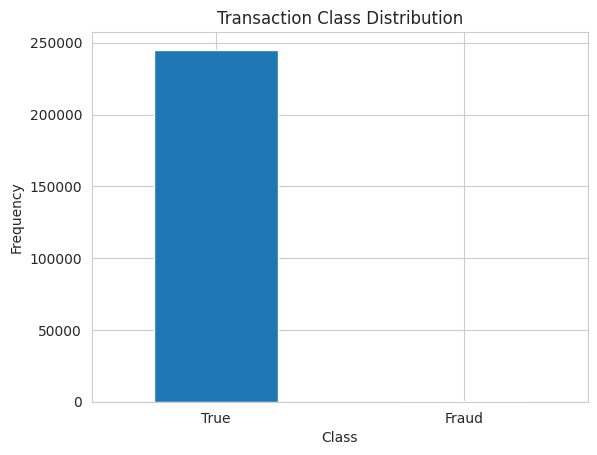

In [36]:
LABELS = ["True", "Fraud"]

count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [37]:
corr=df[['Time','V3','V4','Amount','Class']].corr()
corr

,Time,V3,V4,Amount,Class
Time,1.00,-0.41,-0.10,0.01,-0.01
V3,-0.41,1.00,-0.01,-0.21,-0.21
V4,-0.10,-0.01,1.00,0.10,0.14
Amount,0.01,-0.21,0.10,1.00,0.01
Class,-0.01,-0.21,0.14,0.01,1.00


In [38]:
df['V3']
df[['Time','V3','V4','Amount','Class']]

,Time,V3,V4,Amount,Class
0,0.00,2.54,1.38,149.62,0.00
1,0.00,0.17,0.45,2.69,0.00
2,1.00,1.77,0.38,378.66,0.00
3,1.00,1.79,-0.86,123.50,0.00
4,2.00,1.55,0.40,69.99,0.00
...,...,...,...,...,...
245596,152819.00,0.63,-2.86,69.00,0.00
245597,152820.00,-0.42,3.79,36.89,0.00
245598,152821.00,-1.09,-1.76,55.50,0.00
245599,152822.00,-0.50,0.21,11.50,0.00


In [41]:
from matplotlib import pyplot as plt
_df_15['Amount'].plot(kind='line', figsize=(8, 4), title='Amount')
plt.gca().spines[['top', 'right']].set_visible(False)

NameError: name '_df_15' is not defined

In [42]:
from matplotlib import pyplot as plt
_df_0['Time'].plot(kind='hist', bins=20, title='Time')
plt.gca().spines[['top', 'right',]].set_visible(False)

NameError: name '_df_0' is not defined

In [43]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [44]:
data.Class.value_counts()

,count
Class,
0.00,245151
1.00,449


In [45]:
cheating= data[data['Class']==1]
normal = data[data['Class']==0]
pd.concat([cheating.Amount.describe(), normal.Amount.describe()], axis=1)

,Amount,Amount
count,449.00,245151.00
mean,121.12,90.98
std,252.91,252.60
min,0.00,0.00
25%,1.00,6.00
50%,9.29,23.35
75%,105.89,79.95
max,2125.87,19656.53


In [46]:
pd.concat([cheating.Time.describe(), normal.Time.describe()], axis=1)

,Time,Time
count,449.00,245151.00
mean,73172.20,84119.91
std,42978.75,42143.65
min,406.00,0.00
25%,41138.00,49843.00
50%,67857.00,76702.00
75%,101597.00,126154.50
max,152802.00,152822.00


array([[<Axes: title={'center': 'Time'}>]], dtype=object)

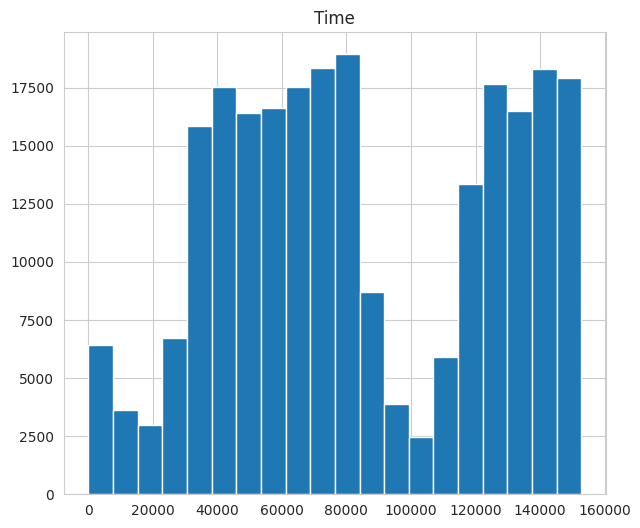

In [47]:
df.hist(column="Time", figsize=(7,6), bins=20)

<ipython-input-48-71e2bfb750ad>:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Class'], sort = True)


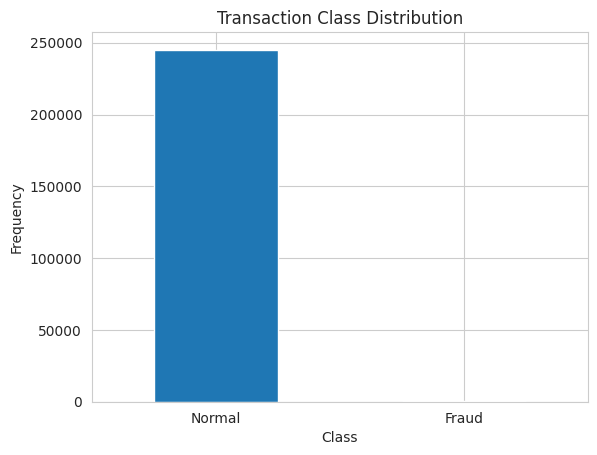

In [48]:
LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

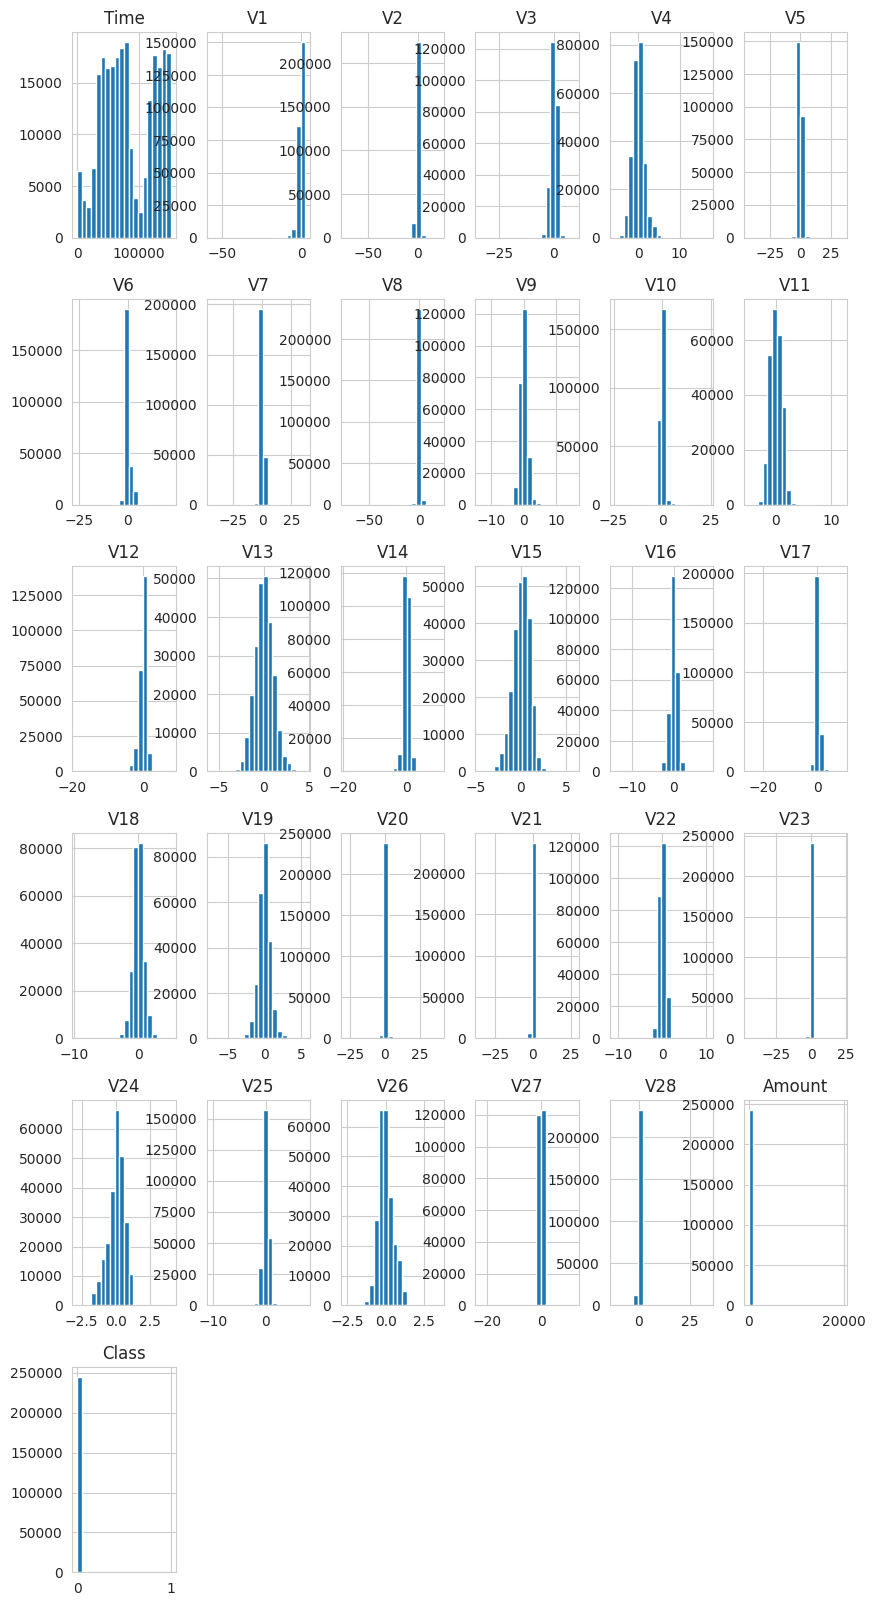

In [49]:
df.hist(figsize=(10,20), bins=20)

# Data Mining

Handle Missing Values

In [50]:
imputer = SimpleImputer(strategy='median')
data_imputed = imputer.fit_transform(data)

Convert back to DataFrame for easier handling

In [51]:
data_imputed = pd.DataFrame(data_imputed, columns=data.columns)
print("Data after handling missing values:")
print(data_imputed.head())

Data after handling missing values:
   Time    V1    V2   V3    V4    V5    V6    V7    V8    V9  ...   V21   V22  \
0  0.00 -1.36 -0.07 2.54  1.38 -0.34  0.46  0.24  0.10  0.36  ... -0.02  0.28   
1  0.00  1.19  0.27 0.17  0.45  0.06 -0.08 -0.08  0.09 -0.26  ... -0.23 -0.64   
2  1.00 -1.36 -1.34 1.77  0.38 -0.50  1.80  0.79  0.25 -1.51  ...  0.25  0.77   
3  1.00 -0.97 -0.19 1.79 -0.86 -0.01  1.25  0.24  0.38 -1.39  ... -0.11  0.01   
4  2.00 -1.16  0.88 1.55  0.40 -0.41  0.10  0.59 -0.27  0.82  ... -0.01  0.80   

    V23   V24   V25   V26   V27   V28  Amount  Class  
0 -0.11  0.07  0.13 -0.19  0.13 -0.02  149.62   0.00  
1  0.10 -0.34  0.17  0.13 -0.01  0.01    2.69   0.00  
2  0.91 -0.69 -0.33 -0.14 -0.06 -0.06  378.66   0.00  
3 -0.19 -1.18  0.65 -0.22  0.06  0.06  123.50   0.00  
4 -0.14  0.14 -0.21  0.50  0.22  0.22   69.99   0.00  

[5 rows x 31 columns]


**Binning**

Binning by mean

In [52]:
data_imputed['Binned_Amount'] = pd.cut(data_imputed['Amount'], bins=5, labels=False)

Group by the binned values and calculate the mean

In [53]:
binned_means = data_imputed.groupby('Binned_Amount')['Amount'].mean()

Map the means back to the Binned_Amount column

In [54]:
data_imputed['Binned_Amount'] = data_imputed['Binned_Amount'].map(binned_means)
#Output

print("Data after binning:")
print(data_imputed[['Amount', 'Binned_Amount']].head())

Data after binning:
   Amount  Binned_Amount
0  149.62          88.24
1    2.69          88.24
2  378.66          88.24
3  123.50          88.24
4   69.99          88.24


# **Reduction**

Dimensionality Reduction

In [55]:
from sklearn.decomposition import PCA

# Dimensionality Reduction using PCA
pca = PCA(n_components=10)
data_reduced = pca.fit_transform(data_imputed)

# Convert back to DataFrame for easier handling
data_reduced = pd.DataFrame(data_reduced, columns=[f'PC{i}' for i in range(1, 11)])
print("Data after PCA:")
print(data_reduced.head())

Data after PCA:
       PC1    PC2    PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10
0 84100.18  57.61 -22.17  0.70  0.33  0.36 -1.70 -0.23  0.49 -0.19
1 84100.18 -81.38  25.50 -1.41 -0.26  0.73  0.78  0.41 -0.95  0.12
2 84099.17 274.26 -96.48  0.20  0.46 -0.42 -1.00  0.99  0.26 -0.48
3 84099.18  32.90 -13.70  0.37  0.47 -1.35 -0.51  0.98  0.36 -0.52
4 84098.18 -17.72   3.66  0.79 -0.49 -0.34 -1.05 -0.21 -0.20  0.15


Attribute Subset Selection

In [56]:
from sklearn.ensemble import RandomForestClassifier


Feature selection using Random Forest

In [ ]:
model = RandomForestClassifier()
model.fit(data_imputed.drop(columns=['Class']), data_imputed['Class'])
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

Select top 10 features

In [ ]:
top_features = indices[:10]
data_selected = data_imputed.iloc[:, top_features]

Convert back to DataFrame for easier handling

In [ ]:
data_selected = pd.DataFrame(data_selected, columns=data.columns[top_features])
print("Data after feature selection:")
print(data_selected.head())

# **Transformation**

**Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

*Normalizing*

In [ ]:
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data_selected)

*Convert back to DataFrame for easier handling*

In [ ]:
data_normalized = pd.DataFrame(data_normalized, columns=data_selected.columns)
print("Data after normalization:")
print(data_normalized.head())

**Feature Engineering**

In [ ]:
data['New_Feature'] = data['Amount'] * data['Time']#Creating a new feature
print("Data with new feature:")
print(data[['Amount', 'Time', 'New_Feature']].head())

# **Data Mining**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

Initialize model

In [ ]:
rf_model = RandomForestClassifier()
lr_model = LogisticRegression(max_iter=1000)
svc_model = SVC(probability=True)

Train and evaluate RandomForestClassifier

In [ ]:
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
print("RandomForestClassifier Results:")
print("Classification Report:")
print(classification_report(y_test, rf_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))

Train and evaluate Logistic Regression

In [ ]:
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
print("\nLogistic Regression Results:")
print("Classification Report:")
print(classification_report(y_test, lr_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, lr_y_pred))

Train and evaluate Support Vector Classifier

In [ ]:
svc_model.fit(X_train, y_train)
svc_y_pred = svc_model.predict(X_test)
print("\nSupport Vector Classifier Results:")
print("Classification Report:")
print(classification_report(y_test, svc_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, svc_y_pred))

Evaluation of model

In [ ]:
from sklearn.model_selection import cross_val_score

Cross-validation for RandomForestClassifier

In [ ]:
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("\nRandomForestClassifier Cross-validation Scores:", rf_cv_scores)
print("Mean Cross-validation Score:", rf_cv_scores.mean())

Cross-validation for Logistic Regression

In [ ]:
lr_cv_scores = cross_val_score(lr_model, X, y, cv=5)
print("\nLogistic Regression Cross-validation Scores:", lr_cv_scores)
print("Mean Cross-validation Score:", lr_cv_scores.mean())

Cross-validation for Support Vector Classifier

In [ ]:
svc_cv_scores = cross_val_score(svc_model, X, y, cv=5)
print("\nSupport Vector Classifier Cross-validation Scores:", svc_cv_scores)
print("Mean Cross-validation Score:", svc_cv_scores.mean())

In [ ]:
from sklearn.model_selection import GridSearchCV

Define parameter grids

In [ ]:
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

svc_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

Grid search for RandomForestClassifier

In [ ]:
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
print("\nBest parameters for RandomForestClassifier:", rf_grid_search.best_params_)

Grid search for Logistic Regression

In [ ]:
lr_grid_search = GridSearchCV(estimator=lr_model, param_grid=lr_param_grid, cv=5, n_jobs=-1)
lr_grid_search.fit(X_train, y_train)
print("\nBest parameters for Logistic Regression:", lr_grid_search.best_params_)

Grid search for Support Vector Classifier

In [ ]:
svc_grid_search = GridSearchCV(estimator=svc_model, param_grid=svc_param_grid, cv=5, n_jobs=-1)
svc_grid_search.fit(X_train, y_train)
print("\nBest parameters for Support Vector Classifier:", svc_grid_search.best_params_)